# Full test ETNN configs determined by optuna

## Importing section

In [1]:
import os
import sys

from etnn.tools.param_calc_config import calc_n_params_config

sys.path.insert(0, os.path.pardir)

In [2]:
import pandas as pd

from etnn.routines.run_config import run_config

import matplotlib.pyplot as plt

from etnn.tools.training_tools import ConfigStore

## Definitions section

In [3]:
def create_plot(
        config_idx: int,
        what: str = "r2"
) -> None:
    plt.figure()
    # load data
    STORAGE_FOLDER = os.path.join("../../results", str(config_idx))
    df_measures = pd.read_csv(os.path.join(STORAGE_FOLDER, "accuracies.csv"))

    # Plot the initial data
    for config_id in df_measures.config_id.unique():
        # make subdataset for config id
        sub_df = df_measures[df_measures.config_id == config_id]

        # plot train test and val
        for mode in ['train', 'test', 'val']:
            # plot training
            if f"{mode}_{what}" in sub_df.columns:
                plt.plot(sub_df.epoch, sub_df[f"{mode}_{what}"], label=f"{config_id}_{mode}-{what}")

    plt.title(f"{what} plot")
    plt.xlabel("epoch")
    plt.ylabel("score")
    if what == "r2":
        plt.ylim(-1, +1)
    elif what == "loss":
        plt.yscale('log')
    plt.legend()
    plt.show()

## Tree advanced label

In [4]:
n_reductions = 5
quotient = 1.2

In [5]:
# define label to show
label = "tree_advanced"

# load config storage
config_table = pd.read_csv("study_label-tree-advanced.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# get first entry from dataframe
entry = config_table.iloc[0]

# setup config
config = ConfigStore(
    in_dim=15,
    hidden_dim=int(entry.params_hidden_dim),
    out_dim=1,
    k=int(entry.params_k),
    dataset=0,
    ds_size=10_000,
    num_gondolas=10,
    num_part_pg=5,
    loss_name='mse',
    optimizer_name='adam',
    num_max_epochs=300,
    learning_rate=float(entry.params_learning_rate),
    batch_size=1024,
    early_stop_tol=5,
    use_equal_batcher=bool(entry.params_batcher),
    seed=420,
    label_type=label,
    final_label_factor=1/1000
)

Reduction 0, learning-rate: 0.0027798626982959: 
Parameters etnn: 1793
Parameters baseline: 3017


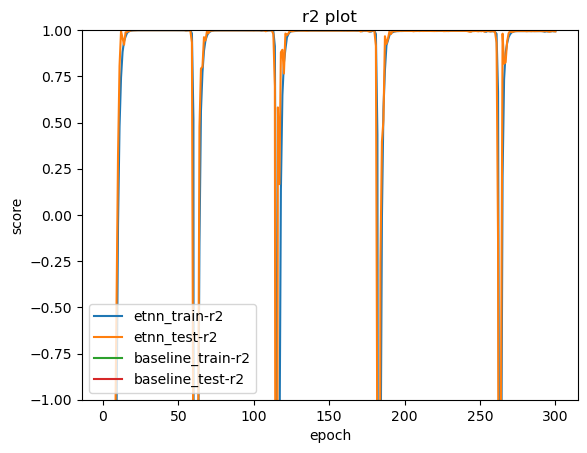

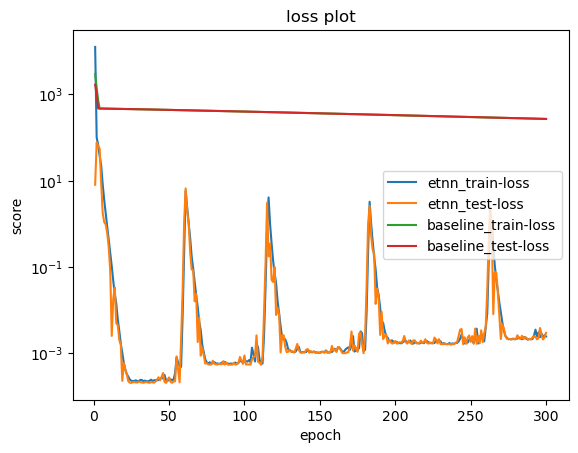

Reduction 1, learning-rate: 0.0023165522485799166: 


100%|██████████| 300/300 [18:47<00:00,  3.76s/it]


Parameters etnn: 1793
Parameters baseline: 3017


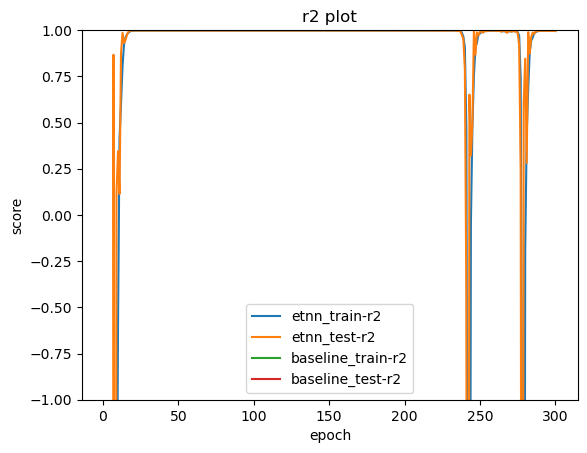

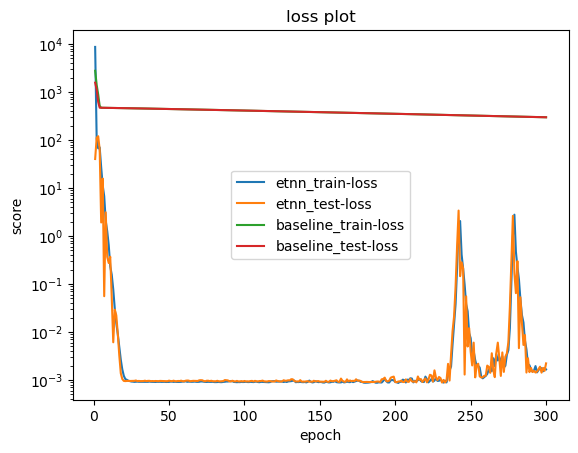

Reduction 2, learning-rate: 0.0019304602071499306: 


100%|██████████| 300/300 [18:22<00:00,  3.68s/it]


Parameters etnn: 1793
Parameters baseline: 3017


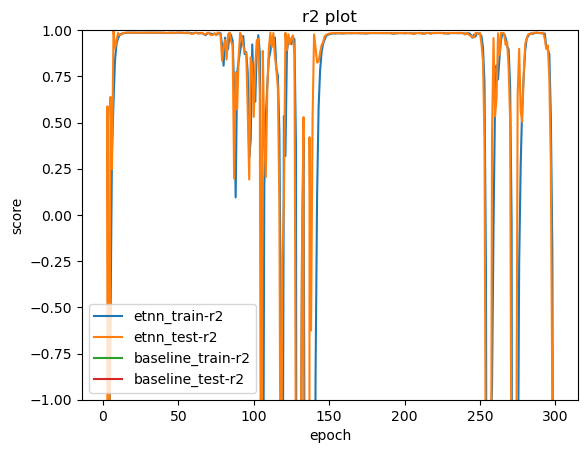

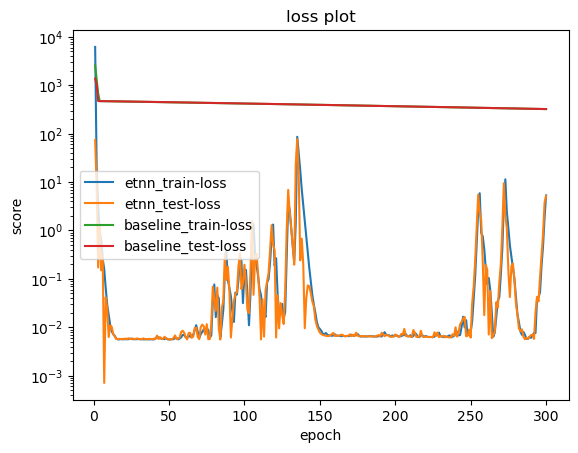

Reduction 3, learning-rate: 0.001608716839291609: 


100%|██████████| 300/300 [17:26<00:00,  3.49s/it]


Parameters etnn: 1793
Parameters baseline: 3017


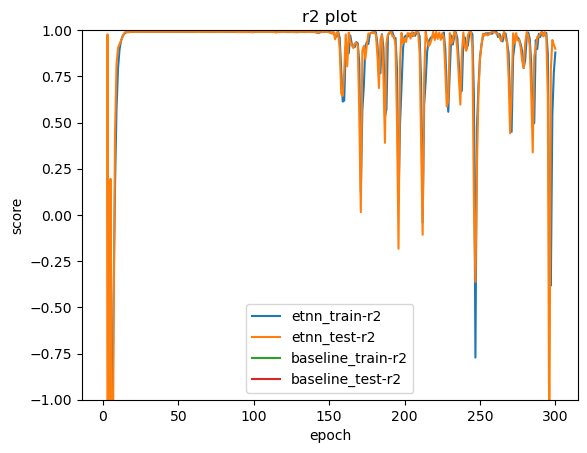

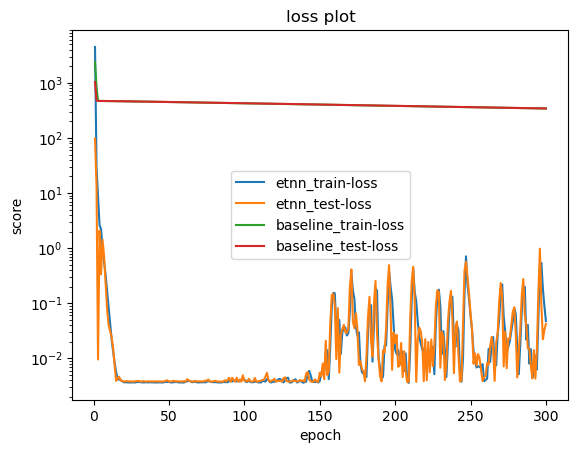

Reduction 4, learning-rate: 0.001340597366076341: 


100%|██████████| 300/300 [17:29<00:00,  3.50s/it]


Parameters etnn: 1793
Parameters baseline: 3017


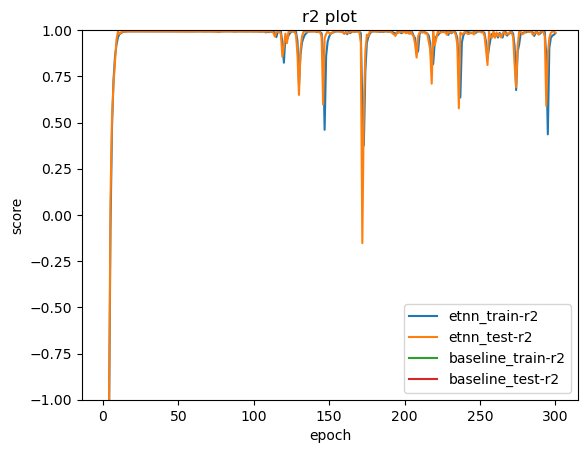

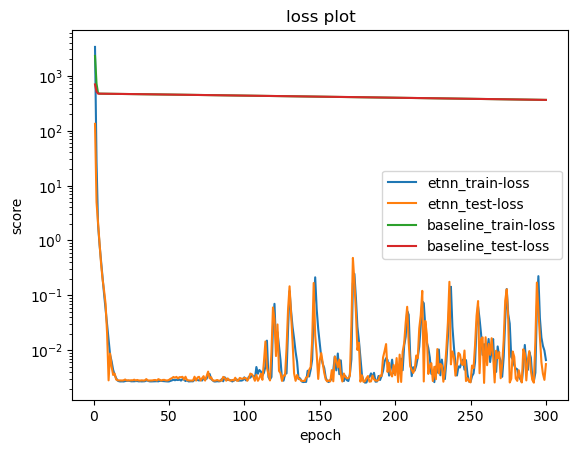

Reduction 5, learning-rate: 0.001117164471730284: 


100%|██████████| 300/300 [17:34<00:00,  3.52s/it]


Parameters etnn: 1793
Parameters baseline: 3017


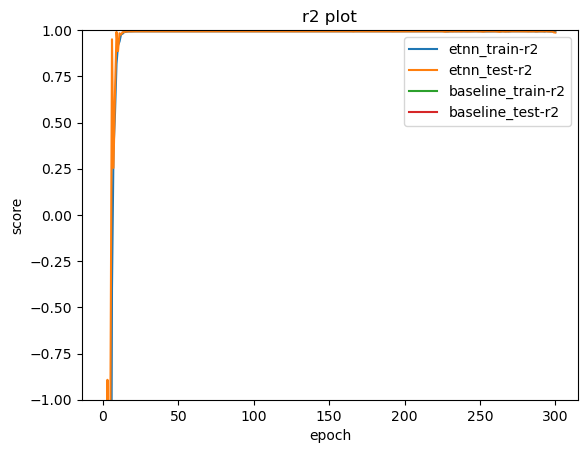

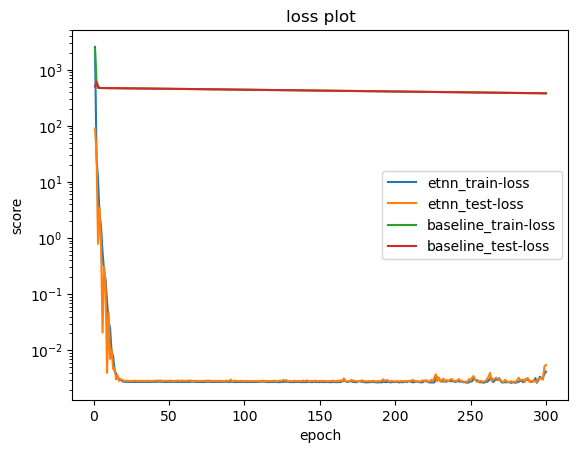

In [6]:
for i in range(n_reductions+1):
    print(f"Reduction {i}, learning-rate: {config.learning_rate}: ")

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

    # reduce learning rate
    config.learning_rate /= quotient

## Default label

In [4]:
n_reductions = 7
quotient = 1.2

In [5]:
# define label to show
label = "default"

# load config storage
config_table = pd.read_csv("study_label-default.csv")

# sort config storage
config_table = config_table.sort_values(by=['value'], ascending=False)

# get third entry from dataframe
entry = config_table.iloc[2]

# setup config
config = ConfigStore(
    in_dim=15,
    hidden_dim=int(entry.params_hidden_dim),
    out_dim=1,
    k=int(entry.params_k),
    dataset=0,
    ds_size=10_000,
    num_gondolas=10,
    num_part_pg=5,
    loss_name='mse',
    optimizer_name='adam',
    num_max_epochs=300,
    learning_rate=float(entry.params_learning_rate),
    batch_size=1024,
    early_stop_tol=5,
    use_equal_batcher=bool(entry.params_batcher),
    seed=420,
    label_type=label,
    final_label_factor=1/1000
)

Reduction 0, learning-rate: 0.0001595015979216: 
Parameters etnn: 644913
Parameters baseline: 673979


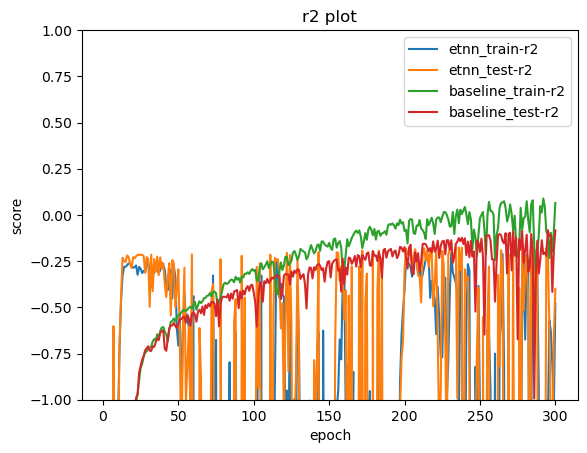

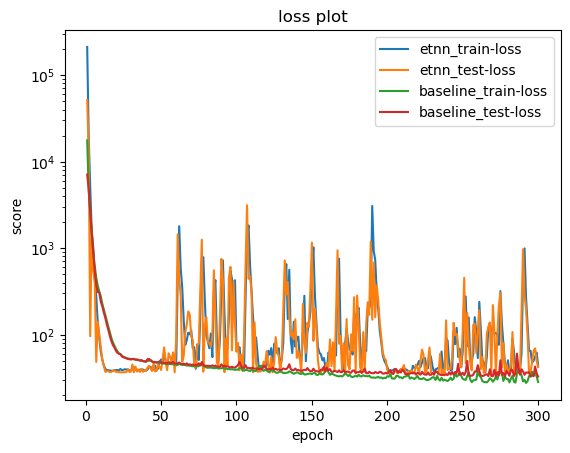

Reduction 1, learning-rate: 0.000132917998268: 
Parameters etnn: 644913
Parameters baseline: 673979


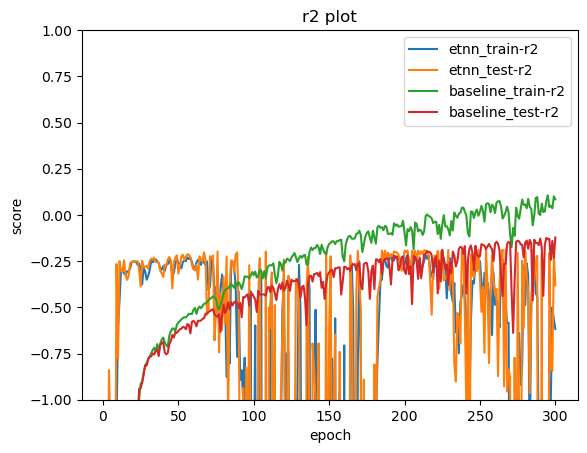

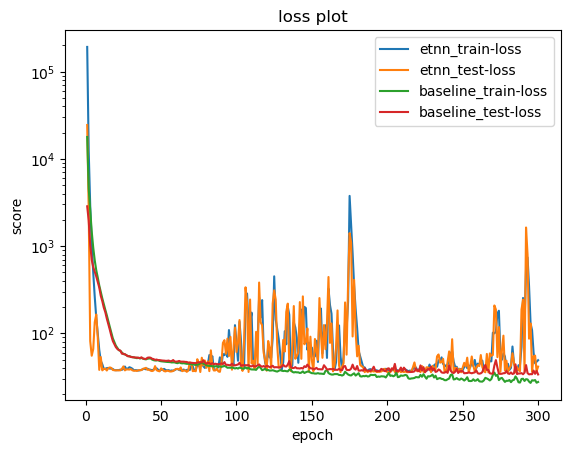

Reduction 2, learning-rate: 0.00011076499855666667: 
Parameters etnn: 644913
Parameters baseline: 673979


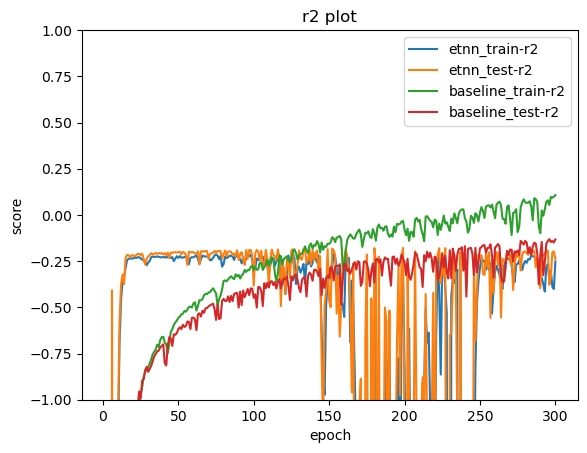

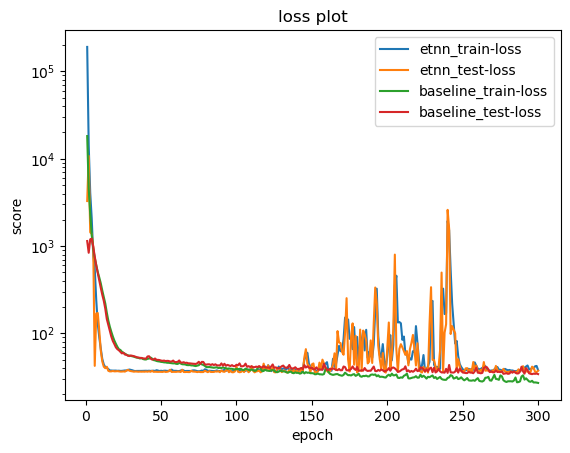

Reduction 3, learning-rate: 9.23041654638889e-05: 
Parameters etnn: 644913
Parameters baseline: 673979


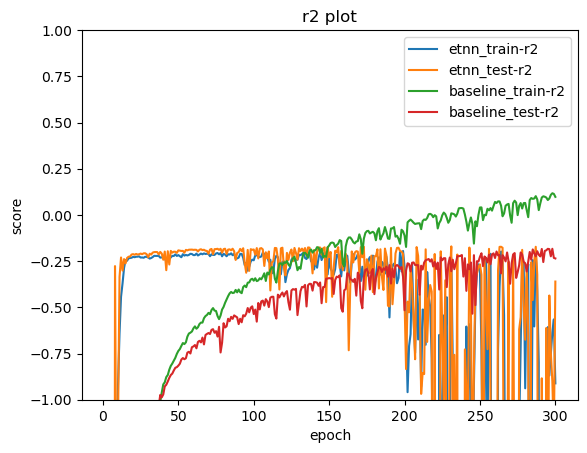

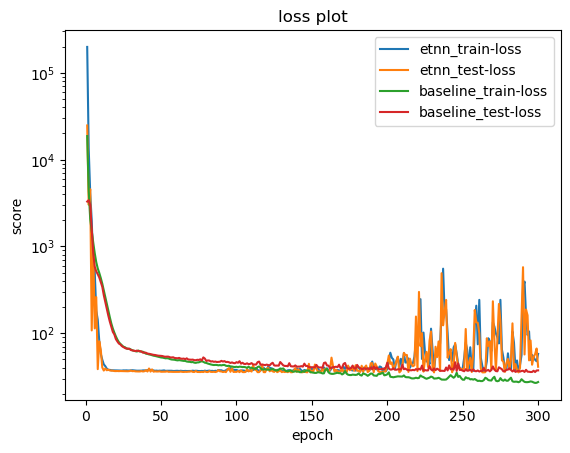

Reduction 4, learning-rate: 7.69201378865741e-05: 
Parameters etnn: 644913
Parameters baseline: 673979


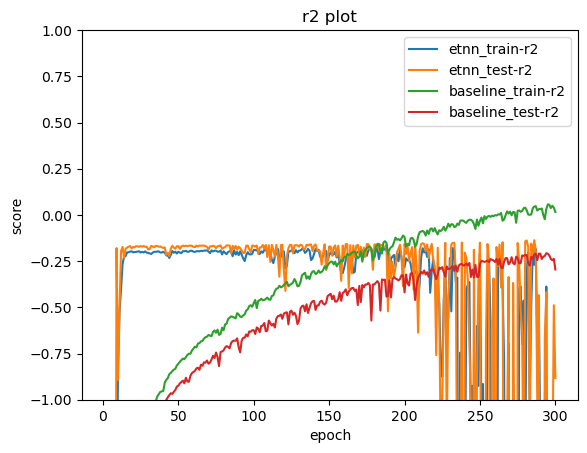

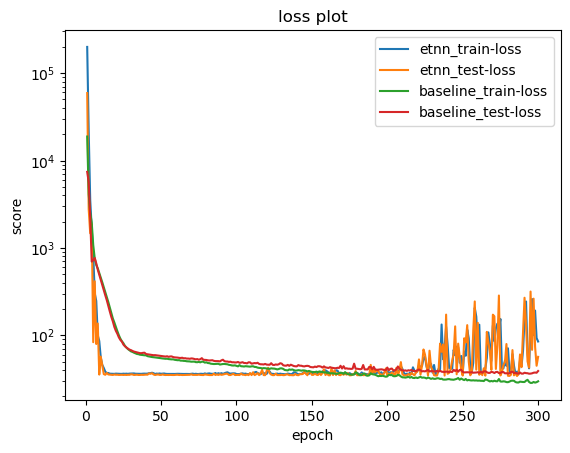

Reduction 5, learning-rate: 6.410011490547842e-05: 
Parameters etnn: 644913
Parameters baseline: 673979


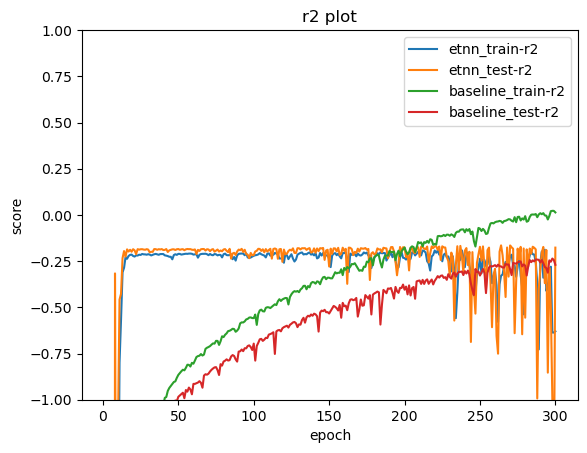

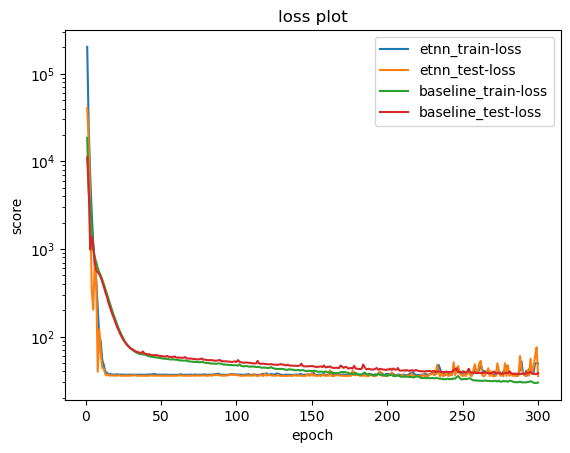

Reduction 6, learning-rate: 5.3416762421232015e-05: 


100%|██████████| 300/300 [18:57<00:00,  3.79s/it]


Parameters etnn: 644913
Parameters baseline: 673979


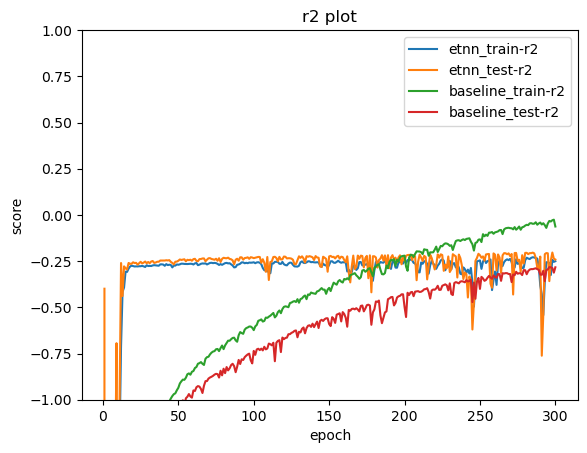

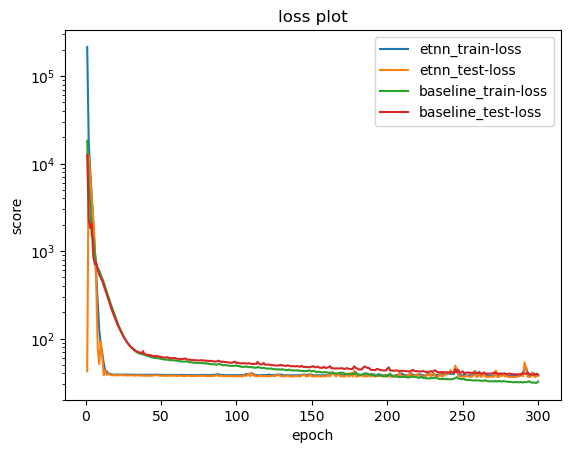

Reduction 7, learning-rate: 4.451396868436001e-05: 


100%|██████████| 300/300 [20:01<00:00,  4.01s/it]


Parameters etnn: 644913
Parameters baseline: 673979


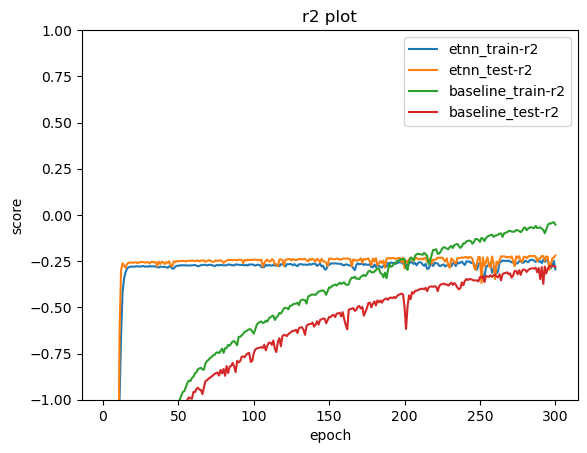

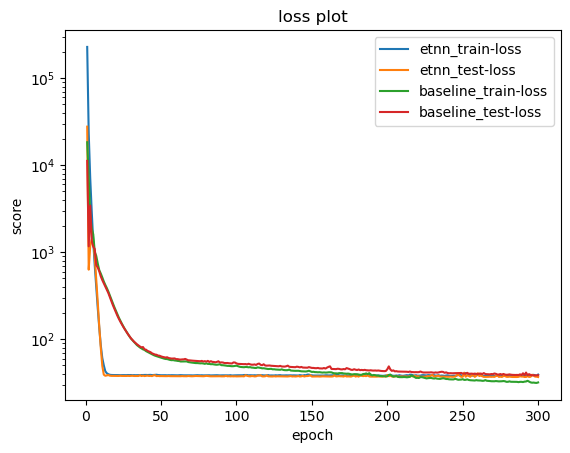

In [6]:
for i in range(n_reductions+1):
    print(f"Reduction {i}, learning-rate: {config.learning_rate}: ")

    # run config and retrieve idx
    config_idx = run_config(
        config=config,
        dataset_path="../../datasets",
        verbose=True,
        results_folder="../../results",
        check_duplicate=True
    )

    # print number of parameters
    n_params_etnn, n_params_baseline = calc_n_params_config(config)
    print(f"Parameters etnn: {n_params_etnn}\nParameters baseline: {n_params_baseline}")

    # plot results
    create_plot(config_idx, what="r2")
    create_plot(config_idx, what="loss")

    # reduce learning rate
    config.learning_rate /= quotient